## ACIL DMBI  Challange

In [0]:
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Load Data

# New Section

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:


df_TestActualConsumptionData = pd.read_csv('TestActualConsumptionData.csv')
df_TestProdData = pd.read_csv('TestProdData.csv')
df_TrainActualConsumptionData = pd.read_csv('TrainActualConsumptionData.csv')
df_TrainPlannedDailyProduction = pd.read_csv('TrainPlannedDailyProduction.csv')
df_TrainProdData = pd.read_csv('TrainProdData.csv')

df_SampleSubmission3 = pd.read_csv('SampleSubmission3.csv')


## EDA

In [0]:
#df_TrainProdData.head()

In [0]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    return anomalies

In [0]:

df_TrainActualConsumptionData['DateTime'] = pd.to_datetime(df_TrainActualConsumptionData['ConsumptionDate'],format='%d/%m/%Y %H:%M')
df_TrainProdData['DateTime'] = pd.to_datetime(df_TrainProdData['ProductionDate'],format='%d/%m/%Y %H:%M')
merged_df = df_TrainActualConsumptionData.merge(df_TrainProdData, left_on='DateTime', right_on='DateTime')
merged_df.set_index('DateTime', inplace=True)
def outliers(x): 
    x[np.abs(x- x.rolling(250,center=True).median()) > 1*(x.quantile(.75)-x.quantile(0.25))]=np.NaN
    return x

x = merged_df.apply(lambda s: pd.to_numeric(s, errors='coerce'))
x = x.apply(lambda s: outliers(s))

x = x[x.index < pd.to_datetime('31.3.2019')]


df_merged = x.fillna(method='backfill').fillna(method='bfill').fillna(method='ffill')
#df_merged.info()
#df_merged.tail()


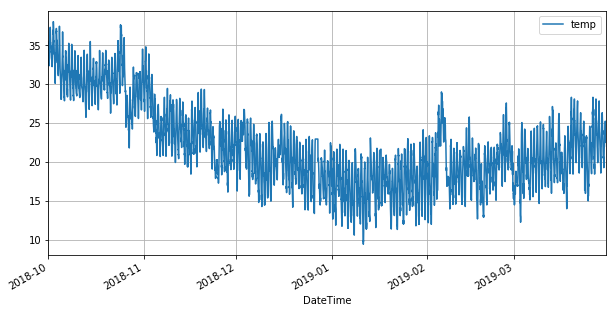

In [0]:
df_merged.plot( y=['temp'], figsize=(10,5), grid=True)

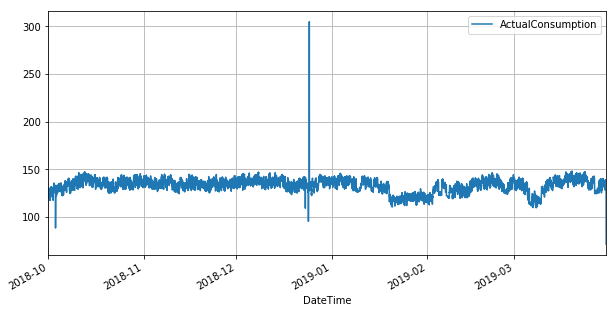

In [0]:
df_merged.plot( y=['ActualConsumption'], figsize=(10,5), grid=True)

In [0]:

ser = df_merged.drop(columns=['ConsumptionDate','ProductionDate'])

split_date = '17/03/2019  0:00:00'

#pd.to_datetime(ser['DateTime'],format='%d/%m/%Y %H:%M')
#ser.index

X_train = ser.loc[ser.index <= split_date].copy()
X_test = ser.loc[ser.index > split_date].copy()


Y_train = X_train['ActualConsumption']
Y_test = X_test['ActualConsumption']

X_train.drop(["ActualConsumption"], axis=1);
X_test.drop(["ActualConsumption"], axis=1);
print(X_train.shape, X_test.shape)
print(len(X_train), len(X_test))

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

look_back = 1
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(ser) 

NameError: ignored

In [0]:

import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(5, input_dim=look_back, activation='relu'))
model.add(Dense(40))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=2, verbose=2)

ValueError: ignored